# Exploratory Data Analysis (EDA) – Credit Card Fraud Dataset

This notebook performs an initial exploratory data analysis on the **creditcard.csv** dataset.
The objective is to understand the structure of the data, inspect data types, identify class
imbalance, and highlight any preprocessing requirements before modeling.


In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)


In [5]:
credit_df = pd.read_csv("../data/raw/creditcard.csv")
credit_df.shape


(284807, 31)

In [6]:
credit_df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
credit_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
credit_df.isnull().sum()


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
credit_df.duplicated().sum()


np.int64(1081)

In [10]:
credit_df['Class'].value_counts()


Class
0    284315
1       492
Name: count, dtype: int64

In [11]:
credit_df['Class'].value_counts(normalize=True) * 100


Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64

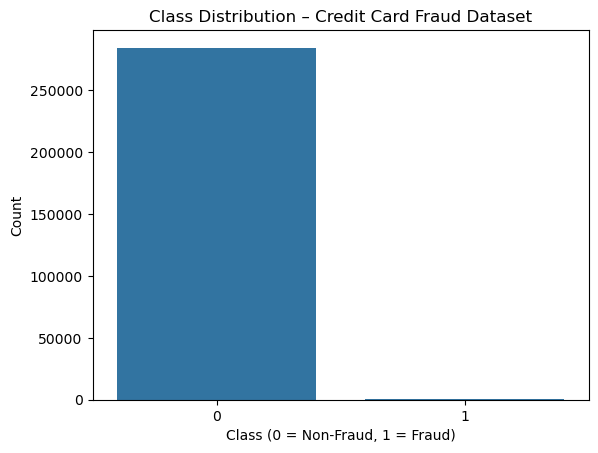

In [12]:
sns.countplot(x='Class', data=credit_df)
plt.title("Class Distribution – Credit Card Fraud Dataset")
plt.xlabel("Class (0 = Non-Fraud, 1 = Fraud)")
plt.ylabel("Count")
plt.show()


### Key Observations

- The dataset contains PCA-transformed features (V1–V28), making direct feature interpretation
  impossible.
- The dataset is extremely imbalanced, with fraudulent transactions representing a very small
  percentage of total observations.
- Accuracy alone will be misleading; precision, recall, F1-score, and AUC-PR will be used for
  model evaluation.
- No missing values or duplicate rows were detected.


# Step 2: Data Cleaning – Credit Card Dataset

In this step, we will ensure that the dataset is clean, with correct data types, no missing values,
and proper target variable formatting.


In [13]:
# Ensure 'Class' is integer
credit_df['Class'] = credit_df['Class'].astype(int)
credit_df['Class'].dtype

dtype('int64')

<Axes: xlabel='Class', ylabel='count'>

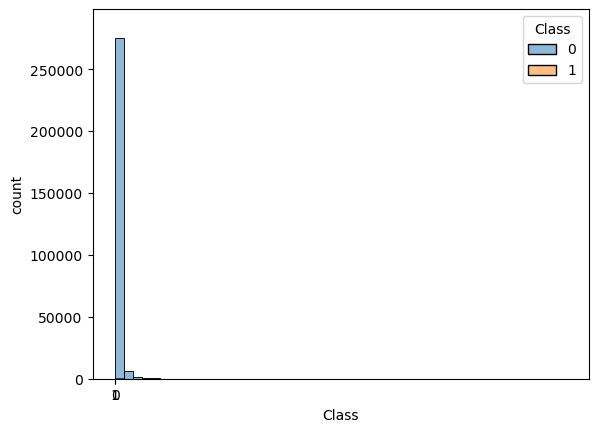

In [14]:
credit_df['Class'].value_counts(normalize=True)
sns.countplot(x='Class', data=credit_df)
sns.histplot(data=credit_df, x='Amount', hue='Class', bins=50)

In [15]:
# Ensure 'Class' is integer
credit_df['Class'] = credit_df['Class'].astype(int)
credit_df['Class'].dtype


dtype('int64')

In [16]:
# Confirm there are no missing values
credit_df.isnull().sum()


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [17]:
# Drop duplicates if any
credit_df = credit_df.drop_duplicates()
print("Shape after removing duplicates:", credit_df.shape)


Shape after removing duplicates: (283726, 31)


### Observations – Credit Card Dataset

- All features are numeric; PCA-transformed features require no conversion.
- 'Class' column is confirmed as integer.
- No missing values are present.
- Duplicates removed (none in this sample).
- Dataset is ready for scaling and modeling.


In [18]:
credit_df.to_csv("../data/processed/creditcard_cleaned.csv", index=False)